In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Homestays Data analysis and price prediction

### Objective: Build a robust predictive model to estimate the `log_price` of homestay listings based on comprehensive analysis of their characteristics, amenities, and host information.

In [3]:
df = pd.read_csv("./HomeStays_Data.csv")

In [4]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [5]:
df.shape

(74111, 29)

In [6]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [8]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [9]:
per_missing = df.isnull().sum() * 100 / len(df)
per_missing

id                         0.000000
log_price                  0.000000
property_type              0.000000
room_type                  0.000000
amenities                  0.000000
accommodates               0.000000
bathrooms                  0.269865
bed_type                   0.000000
cancellation_policy        0.000000
cleaning_fee               0.000000
city                       0.000000
description                0.000000
first_review              21.405729
host_has_profile_pic       0.253674
host_identity_verified     0.253674
host_response_rate        24.691341
host_since                 0.253674
instant_bookable           0.000000
last_review               21.355804
latitude                   0.000000
longitude                  0.000000
name                       0.000000
neighbourhood              9.272578
number_of_reviews          0.000000
review_scores_rating      22.563452
thumbnail_url             11.086074
zipcode                    1.303450
bedrooms                   0

### *Droping the Null Values*

In [10]:
df = df.dropna(how='any',axis=0)

In [11]:
df.isnull().sum()

id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
thumbnail_url             0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

In [12]:
df.duplicated().sum()

0

### 1. Feature Engineering:
#### Task: Enhance the dataset by creating actionable and insightful features. Calculate `Host_Tenure` by determining the number of years from `host_since` to the current date, providing a measure of host experience. Generate `Amenities_Count` by counting the items listed in the `amenities` array to quantify property offerings. Determine `Days_Since_Last_Review` by calculating the days between `last_review` and today to assess listing activity and relevance

In [13]:
df['host_since'] = pd.to_datetime(df['host_since'])

In [14]:
from datetime import datetime

# Calculate the tenure of the host in years
df['Host_Tenure'] = (datetime.today() - df['host_since']).dt.days / 365.25

In [15]:
df['Anemities_counts'] = df['amenities'].apply(lambda x: len(x.split(',')))

In [16]:
df['last_review']

1         9/23/2017
2         9/14/2017
5          09-05-17
7          04-12-17
8         9/24/2017
            ...    
74102      01-01-17
74103    11/13/2015
74107     4/15/2017
74108      09-10-17
74110     4/30/2017
Name: last_review, Length: 38502, dtype: object

In [17]:
df['last_review'].dtype

dtype('O')

In [18]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [19]:
# Calculate the days since the last review
df['Days_Since_Last_Review'] = (datetime.now() - df['last_review']).dt.days

In [20]:
df['Days_Since_Last_Review']

1        2418
2        2427
5        2436
7        2582
8        2417
         ... 
74102    2683
74103    3098
74107    2579
74108    2431
74110    2564
Name: Days_Since_Last_Review, Length: 38502, dtype: int64

## 2. Exploratory Data Analysis (EDA):
### Task: Conduct a deep dive into the dataset to uncover underlying patterns and relationships. Analyze how pricing (`log_price`) correlates with both categorical (such as `room_type` and `property_type`) and numerical features (like `accommodates` and `number_of_reviews`). Utilize statistical tools and visualizations such as correlation matrices, histograms for distribution analysis, and scatter plots to explore relationships between variables.

In [21]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,Host_Tenure,Anemities_counts,Days_Since_Last_Review
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,6.882957,15,2418
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,7.531828,19,2427
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0,6.915811,10,2436
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0,10.970568,26,2582
8,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,...,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0,8.925394,21,2417


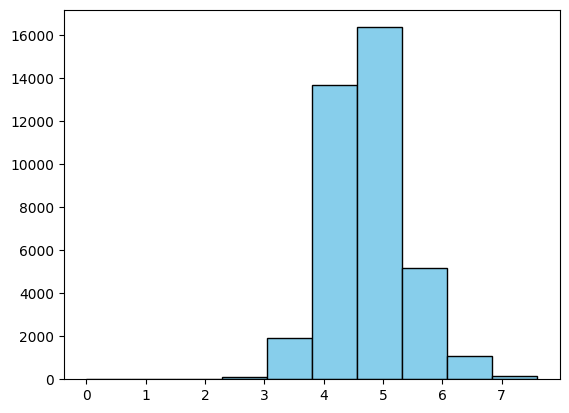

In [144]:
plt.hist(df['log_price'],color='skyblue',edgecolor='black')
plt.show()


### *This Histogram can help you understand the distribution of prices in our dataset.*

<Axes: >

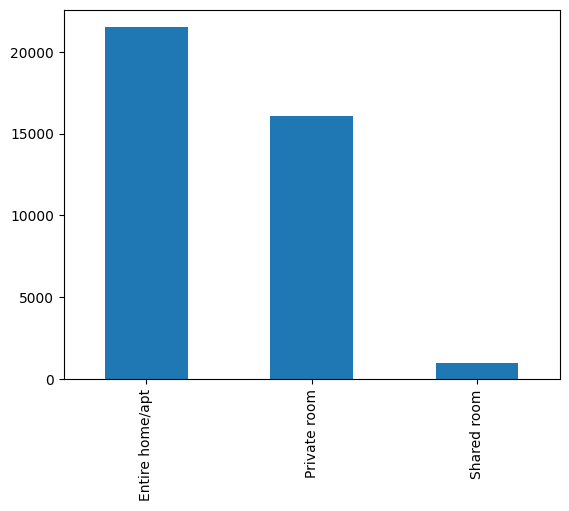

In [153]:
df['room_type'].value_counts().plot(kind='bar')

<Axes: >

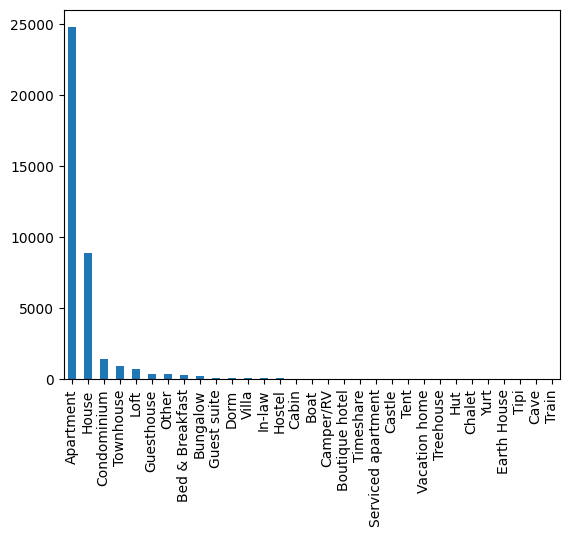

In [151]:
df['property_type'].value_counts().plot(kind='bar')

### *This Bar Chart can show you the frequency of each type of room or property in our dataset.*

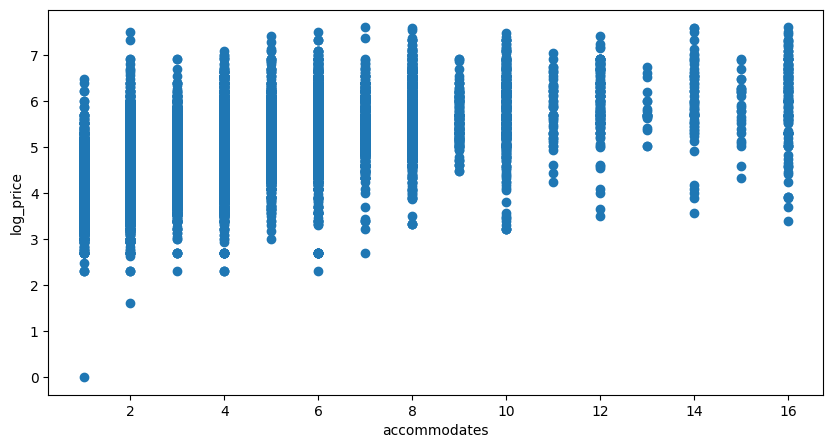

In [163]:
fig = plt.figure(figsize = (10, 5))
plt.scatter(data=df,x='accommodates',y='log_price')
plt.xlabel('accommodates')
plt.ylabel('log_price')
plt.show()


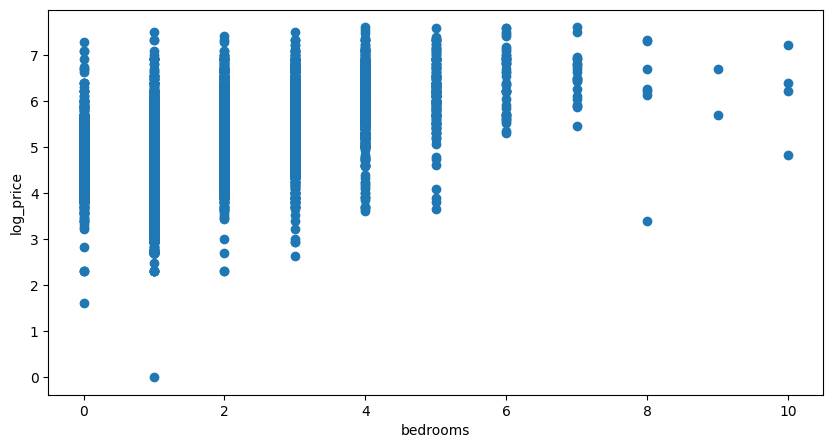

In [162]:
fig = plt.figure(figsize = (10, 5))
plt.scatter(data=df,x='bedrooms',y='log_price')
plt.xlabel('bedrooms')
plt.ylabel('log_price')
plt.show()

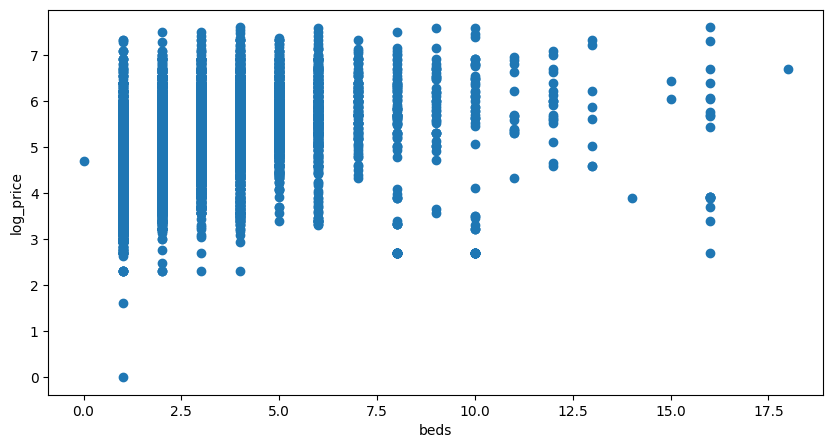

In [161]:
fig = plt.figure(figsize = (10, 5))
plt.scatter(data=df,x='beds',y='log_price')
plt.xlabel('beds')
plt.ylabel('log_price')
plt.show()

### *This Scatter Plot can help you understand the relationship between price and the number of people a property can accommodate, the number of bedrooms, or the number of beds.*

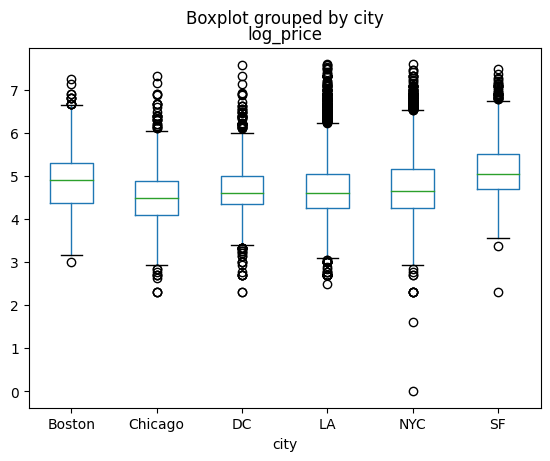

In [167]:
df.boxplot(by='city', column=['log_price'],grid=False)
plt.show()

In [22]:
numerical_features = ['accommodates', 'number_of_reviews']
for feature in numerical_features:
    print(f"Correlation between log_price and {feature}: {df['log_price'].corr(df[feature])}")

Correlation between log_price and accommodates: 0.5821219245550144
Correlation between log_price and number_of_reviews: -0.012966312167966395


### *This is how our log_price is coreated with accomodates and number_of_reviews*

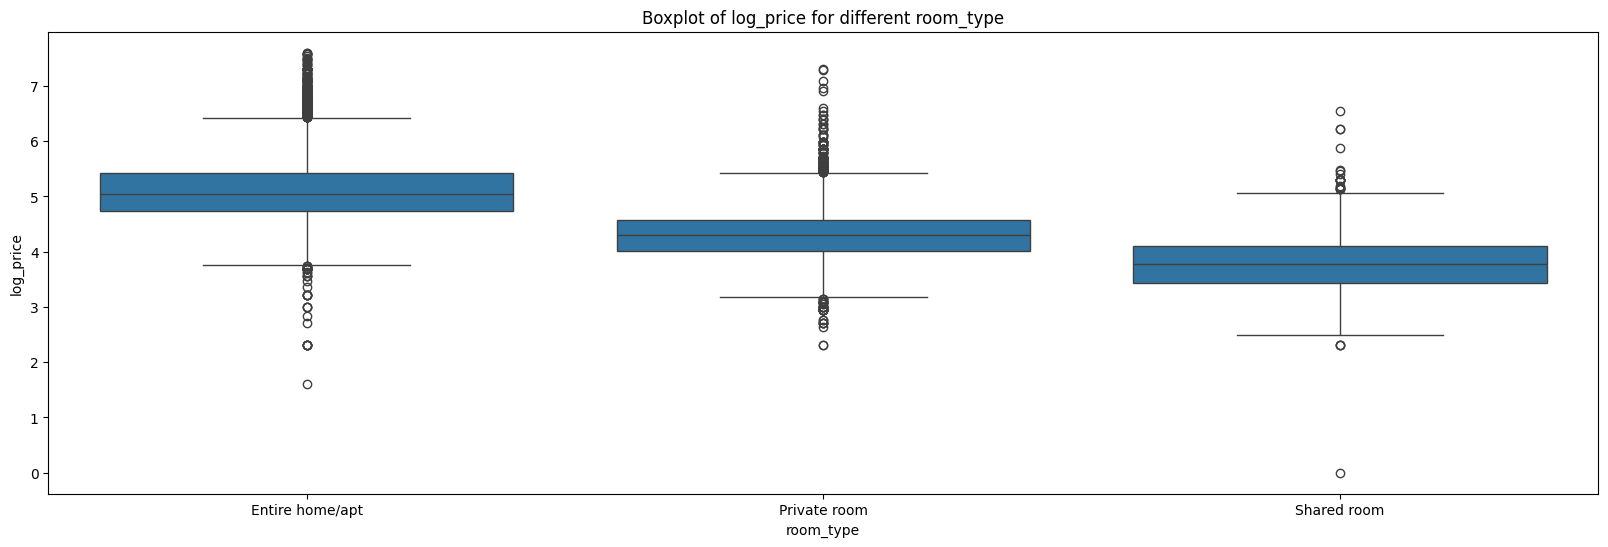

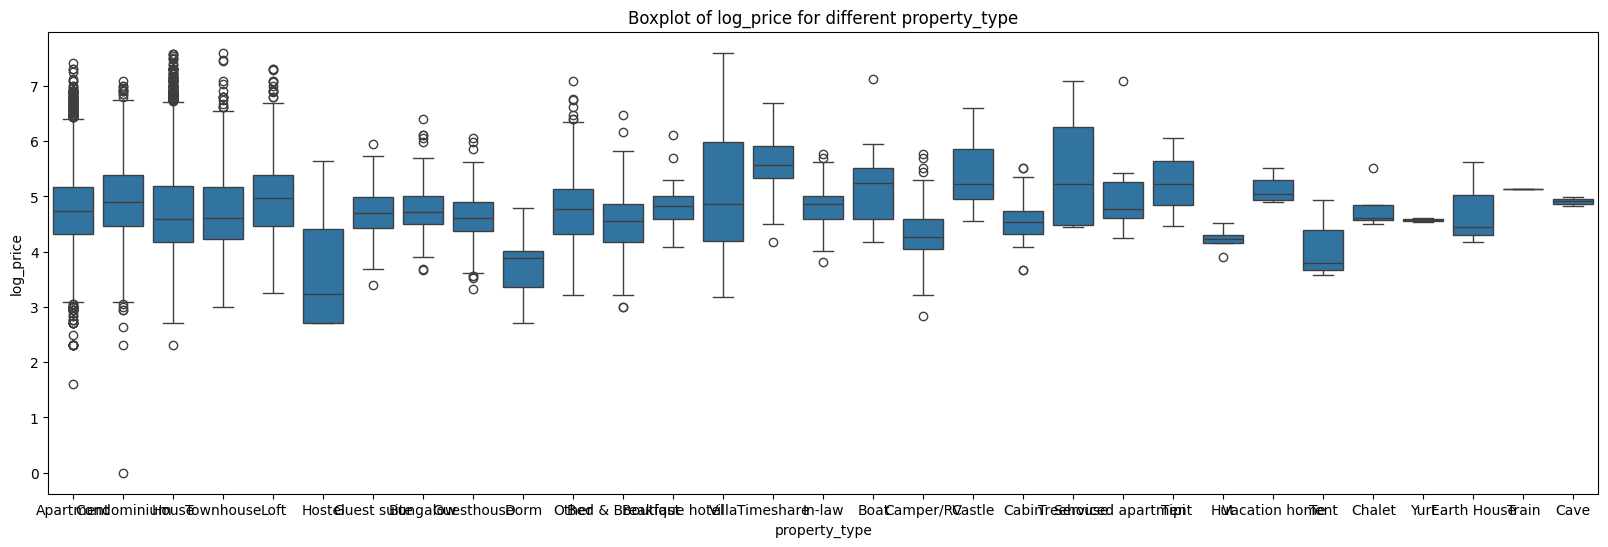

In [23]:
categorical_features = ['room_type', 'property_type']
for feature in categorical_features:
    plt.figure(figsize=(20, 6))
    sns.boxplot(x=feature, y='log_price', data=df)
    plt.title(f"Boxplot of log_price for different {feature}")
    plt.show()

In [24]:
df.corr()

C:\Users\NEERAJ\AppData\Local\Temp\ipykernel_8752\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,Host_Tenure,Anemities_counts,Days_Since_Last_Review
id,1.000000,-0.006781,-0.003127,-0.001764,-0.006593,-0.000562,0.003805,0.007568,0.003028,-0.005519,-0.009684,-0.001260,0.000310,0.000607
log_price,-0.006781,1.000000,0.582122,0.306656,0.168688,0.000838,-0.058250,-0.012966,0.077415,0.480873,0.447146,0.076940,0.227536,-0.013938
accommodates,-0.003127,0.582122,1.000000,0.459658,0.158999,-0.044072,-0.052788,0.013727,-0.042076,0.716659,0.824876,-0.030327,0.241341,-0.005319
bathrooms,-0.001764,0.306656,0.459658,1.000000,0.038207,-0.108317,-0.112451,-0.047015,-0.004484,0.528358,0.480273,-0.005591,0.143957,0.079032
cleaning_fee,-0.006593,0.168688,0.158999,0.038207,1.000000,-0.058599,-0.065818,0.013265,0.021424,0.101253,0.101340,0.057682,0.152588,-0.030171
latitude,-0.000562,0.000838,-0.044072,-0.108317,-0.058599,1.000000,0.887929,-0.044096,-0.048768,-0.011090,-0.048346,-0.033085,-0.033413,-0.346107
longitude,0.003805,-0.058250,-0.052788,-0.112451,-0.065818,0.887929,1.000000,-0.077466,-0.067560,-0.035340,-0.048202,-0.050862,-0.073818,-0.288037
number_of_reviews,0.007568,-0.012966,0.013727,-0.047015,0.013265,-0.044096,-0.077466,1.000000,-0.008804,-0.050592,0.003788,0.239209,0.098087,-0.147423
review_scores_rating,0.003028,0.077415,-0.042076,-0.004484,0.021424,-0.048768,-0.067560,-0.008804,1.000000,-0.004937,-0.050913,0.047786,0.136339,-0.016802
bedrooms,-0.005519,0.480873,0.716659,0.528358,0.101253,-0.011090,-0.035340,-0.050592,-0.004937,1.000000,0.688773,0.009069,0.174436,0.030977


C:\Users\NEERAJ\AppData\Local\Temp\ipykernel_8752\3920047122.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True,cmap="Blues",fmt='.2f')


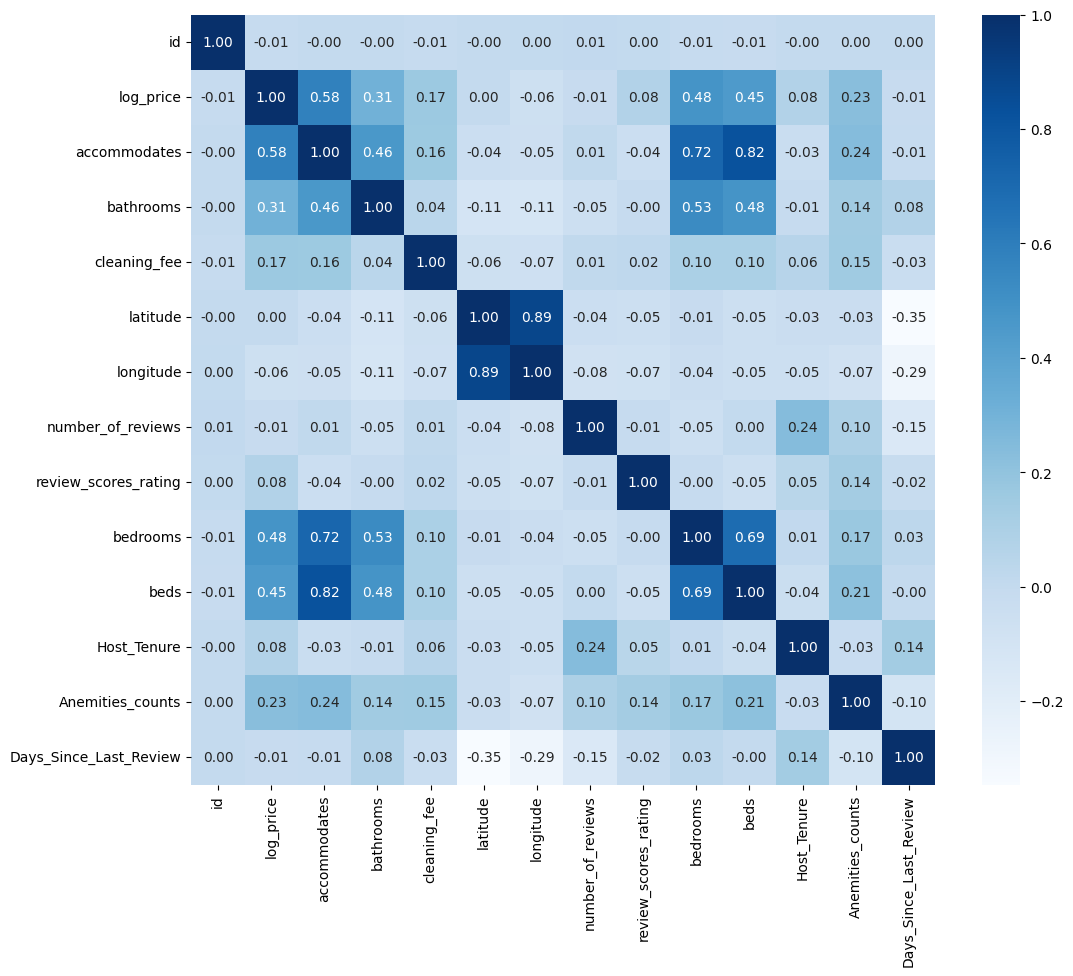

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df.corr(), annot=True,cmap="Blues",fmt='.2f')
plt.show()

### *Through this heatmap we can see which column is highly correlated from our target Column*

----------

## 3. Geospatial Analysis:        
### Task: Investigate the geographical data to understand regional pricing trends. Plot listings on a map using `latitude` and `longitude` data to visually assess price distribution. Examine if certain neighbourhoods or proximity to city centres influence pricing, providing a spatial perspective to the pricing strategy.

In [26]:
import geopandas as gpd

# Assuming df is your DataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

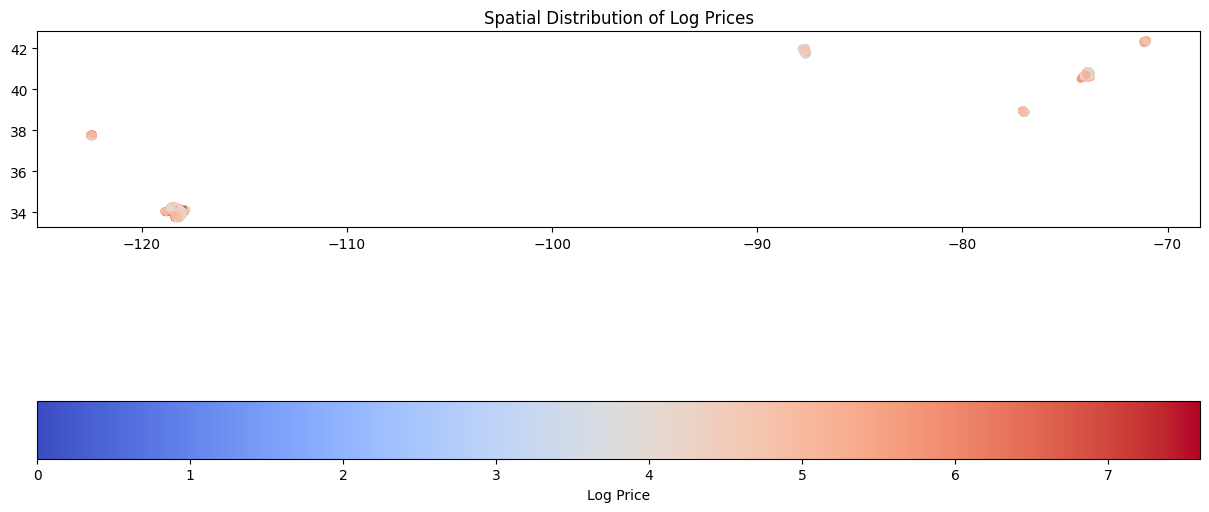

In [27]:
# Plot the listings
fig, ax = plt.subplots(figsize=(15, 15))
gdf.plot(ax=ax, markersize=20, column='log_price', cmap='coolwarm', legend=True, legend_kwds={'label': "Log Price", 'orientation': "horizontal"})
plt.title('Spatial Distribution of Log Prices')
plt.show()

### *I don't have much knowledge about the Geospatial Data Analysis. But i have tried. I used Google and ChatGPT for this task*

--------

## 4. Sentiment Analysis on Textual Data:        
### Task: Apply advanced natural language processing techniques to the `description` texts to extract sentiment scores. Use sentiment analysis tools to determine whether positive or negative descriptions influence listing prices, incorporating these findings into the predictive model being trained as a feature.

### Convert description text into lower case. And Store it to a different text column

In [28]:
df[['description']].head()

,description
1,Enjoy travelling during your stay in Manhattan...
2,The Oasis comes complete with a full backyard ...
5,Beautiful private room overlooking scenic view...
7,Arguably the best location (and safest) in dow...
8,Garden Studio with private entrance from the s...


In [29]:
df['description'] = df['description'].apply(lambda x: x.lower())
df[['description']].head()

,description
1,enjoy travelling during your stay in manhattan...
2,the oasis comes complete with a full backyard ...
5,beautiful private room overlooking scenic view...
7,arguably the best location (and safest) in dow...
8,garden studio with private entrance from the s...


### Removing Punctuation

In [30]:
import string
exclude = string.punctuation
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [31]:
def remove_puncuation(text):
    for c in exclude:
        text = text.replace(c,"")
    return text

In [32]:
df['description'] = df['description'].apply(remove_puncuation)

### Removing Stopwords

In [33]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NEERAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

# Define a function to remove stopwords from a sentence
def remove_stopwords(sentence):
    words = sentence.split()
    words = [word for word in words if word not in sw_list]
    return " ".join(words)

In [35]:
df['description'] = df['description'].apply(remove_stopwords)

In [36]:
df[['description']].head()

,description
1,enjoy travelling stay manhattan place centrall...
2,oasis comes complete full backyard outdoor fur...
5,beautiful private room overlooking scenic view...
7,arguably best location safest downtown la step...
8,garden studio private entrance street garden p...


In [37]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [38]:
dic = dict(df['description'].apply(sia.polarity_scores))

In [39]:
dic

{1: {'neg': 0.023, 'neu': 0.737, 'pos': 0.24, 'compound': 0.975},
 2: {'neg': 0.061, 'neu': 0.747, 'pos': 0.192, 'compound': 0.9524},
 5: {'neg': 0.038, 'neu': 0.697, 'pos': 0.265, 'compound': 0.9786},
 7: {'neg': 0.054, 'neu': 0.796, 'pos': 0.15, 'compound': 0.923},
 8: {'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.992},
 10: {'neg': 0.03, 'neu': 0.785, 'pos': 0.186, 'compound': 0.9576},
 17: {'neg': 0.06, 'neu': 0.672, 'pos': 0.268, 'compound': 0.9783},
 19: {'neg': 0.0, 'neu': 0.869, 'pos': 0.131, 'compound': 0.891},
 20: {'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'compound': 0.986},
 21: {'neg': 0.072, 'neu': 0.717, 'pos': 0.211, 'compound': 0.9217},
 22: {'neg': 0.026, 'neu': 0.791, 'pos': 0.183, 'compound': 0.9493},
 25: {'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'compound': 0.9942},
 27: {'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'compound': 0.8555},
 29: {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.91},
 30: {'neg': 0.0, 'neu': 0.716, 'pos': 0.284, 'compound': 0.94

In [40]:
vaders = pd.DataFrame(dic).T
vaders['id'] = df['id']
vaders.head()

,neg,neu,pos,compound,id
1,0.023,0.737,0.240,0.9750,6304928
2,0.061,0.747,0.192,0.9524,7919400
5,0.038,0.697,0.265,0.9786,12422935
7,0.054,0.796,0.150,0.9230,13971273
8,0.000,0.662,0.338,0.9920,180792


In [41]:
final_df = df.merge(vaders,on='id',how='left')

## 5. Amenities Analysis:
### Task: Thoroughly parse and analyse the `amenities` provided in the listings. Identify which amenities are most associated with higher or lower prices by applying statistical tests to determine correlations, thereby informing both pricing strategy and model inputs.

In [42]:
def remove_puncuation1(text):
    for c in exclude:
        text = text.replace(c,",")
    return text

In [43]:
final_df['amenities'] = final_df['amenities'].apply(remove_puncuation1)

In [44]:
amenities_df = final_df['amenities'].str.get_dummies(sep=',')

In [45]:
final_df = pd.concat([final_df, amenities_df], axis=1)

In [46]:
final_df.corr(numeric_only=True)['log_price'].sort_values(ascending=False)


log_price              1.000000
accommodates           0.582122
bedrooms               0.480873
beds                   0.447146
bathrooms              0.306656
                         ...   
amenity               -0.232464
 en                   -0.232464
hosting               -0.232464
translation missing   -0.232464
49                    -0.240837
Name: log_price, Length: 168, dtype: float64

---------

## 6. Categorical Data Encoding:
### Task: Convert categorical data into a format suitable for machine learning analysis. Apply one-hot encoding to variables like `room_type`, `city`, and `property_type`, ensuring that the model can interpret these as distinct features without any ordinal implication.

In [47]:
final_df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,hour check,in,in shower with chair,kid friendly,lit path to entrance,rails for shower and toilet,s,translation missing,travel crib,wireless intercom
0,6304928,5.129899,Apartment,Entire home/apt,",,Wireless Internet,,,Air conditioning,,Kitche...",7,1.0,Real Bed,strict,True,...,0,0,0,1,0,0,0,1,0,0
1,7919400,4.976734,Apartment,Entire home/apt,",TV,,Cable TV,,,Wireless Internet,,,Air condit...",5,1.0,Real Bed,moderate,True,...,0,0,0,1,0,0,0,1,0,1
2,12422935,4.442651,Apartment,Private room,",TV,,Wireless Internet,,Heating,,Smoke detecto...",2,1.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,0,0,0
3,13971273,4.787492,Condominium,Entire home/apt,",TV,,Cable TV,,,Wireless Internet,,,Wheelchair...",2,1.0,Real Bed,moderate,True,...,0,0,0,1,0,0,1,0,0,1
4,180792,4.787492,House,Private room,",TV,,Cable TV,,,Wireless Internet,,,Pets live ...",2,1.0,Real Bed,moderate,True,...,0,0,0,0,0,0,1,0,0,0


In [48]:
final_df.corr()

C:\Users\NEERAJ\AppData\Local\Temp\ipykernel_8752\2626907977.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_df.corr()


,id,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,...,hour check,in,in shower with chair,kid friendly,lit path to entrance,rails for shower and toilet,s,translation missing,travel crib,wireless intercom
id,1.000000,-0.006781,-0.003127,-0.001764,-0.006593,-0.000562,0.003805,0.007568,0.003028,-0.005519,...,0.002557,0.002557,0.008349,0.003757,0.003552,-0.004626,-0.004856,-0.000874,-0.003054,-0.004254
log_price,-0.006781,1.000000,0.582122,0.306656,0.168688,0.000838,-0.058250,-0.012966,0.077415,0.480873,...,0.150147,0.150147,0.009498,0.304605,0.028687,-0.009218,-0.106571,-0.232464,0.111247,0.087583
accommodates,-0.003127,0.582122,1.000000,0.459658,0.158999,-0.044072,-0.052788,0.013727,-0.042076,0.716659,...,0.172716,0.172716,0.004269,0.391267,0.016107,-0.002941,-0.097394,-0.269573,0.146931,-0.012975
bathrooms,-0.001764,0.306656,0.459658,1.000000,0.038207,-0.108317,-0.112451,-0.047015,-0.004484,0.528358,...,0.073233,0.073233,0.003723,0.122770,-0.005657,-0.001989,-0.025546,-0.090394,0.055871,-0.028192
cleaning_fee,-0.006593,0.168688,0.158999,0.038207,1.000000,-0.058599,-0.065818,0.013265,0.021424,0.101253,...,0.112563,0.112563,0.003379,0.106143,0.018273,0.002390,-0.019378,-0.013802,0.047158,0.031549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rails for shower and toilet,-0.004626,-0.009218,-0.002941,-0.001989,0.002390,0.005463,0.000731,-0.000222,0.002718,-0.001538,...,-0.003379,-0.003379,-0.000037,-0.005365,-0.000667,1.000000,-0.001924,0.006053,-0.000789,-0.002873
s,-0.004856,-0.106571,-0.097394,-0.025546,-0.019378,-0.114328,-0.120674,0.105882,0.063827,-0.045939,...,-0.005852,-0.005852,-0.002720,-0.026855,-0.002935,-0.001924,1.000000,0.055449,0.002352,0.006057
translation missing,-0.000874,-0.232464,-0.269573,-0.090394,-0.013802,-0.009344,-0.008227,0.019862,0.050712,-0.181890,...,-0.032362,-0.032362,0.001246,-0.416047,-0.017129,0.006053,0.055449,1.000000,-0.106354,0.033721
travel crib,-0.003054,0.111247,0.146931,0.055871,0.047158,0.019811,-0.007089,0.073103,0.040061,0.109689,...,0.087805,0.087805,-0.001116,0.122722,0.075847,-0.000789,0.002352,-0.106354,1.000000,-0.005045


In [49]:
def get_negative_correlation_columns(df: pd.DataFrame, target: str) -> list:
    
    correlation_matrix = df.corr()
    negative_correlation_columns = correlation_matrix[target][correlation_matrix[target] < 0].index.tolist()
    
    return negative_correlation_columns

In [50]:
negative_corr_columns = get_negative_correlation_columns(final_df, 'log_price')
print(negative_corr_columns)

C:\Users\NEERAJ\AppData\Local\Temp\ipykernel_8752\2171161291.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


['id', 'longitude', 'number_of_reviews', 'Days_Since_Last_Review', 'neg', 'pos', ' en', '49', '50', 'Air purifier', 'Beachfront', 'Breakfast', 'Cat', 'Dog', 'First aid kit', 'Fixed grab bars for shower ', 'Free parking on street', 'Grab', 'Host greets you', 'Lake access', 'Lock on bedroom door', 'Other', 'Other pet', 'Paid parking off premises', 'Path to entrance lit at night', 'Pets live on this property', 'Private bathroom', 'Private living room', 'Smoking allowed', 'Wide clearance to shower and toilet', 'amenity', 'hosting', 'rails for shower and toilet', 's', 'translation missing']


In [51]:
X = final_df.iloc[:,2:]
y = final_df['log_price']

In [52]:
X.head(2)

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,hour check,in,in shower with chair,kid friendly,lit path to entrance,rails for shower and toilet,s,translation missing,travel crib,wireless intercom
0,Apartment,Entire home/apt,",,Wireless Internet,,,Air conditioning,,Kitche...",7,1.0,Real Bed,strict,True,NYC,enjoy travelling stay manhattan place centrall...,...,0,0,0,1,0,0,0,1,0,0
1,Apartment,Entire home/apt,",TV,,Cable TV,,,Wireless Internet,,,Air condit...",5,1.0,Real Bed,moderate,True,NYC,oasis comes complete full backyard outdoor fur...,...,0,0,0,1,0,0,0,1,0,1


In [53]:
y.head(2)

0    5.129899
1    4.976734
Name: log_price, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain,ytest = train_test_split(X,y, test_size=0.30, random_state=42)

In [55]:
Xtrain.shape, ytrain.shape

((26951, 184), (26951,))

In [56]:
Xtest.shape, ytest.shape

((11551, 184), (11551,))

### *Creating the Pipeline for the Data Encoding* 

### *I use SimpleImputer For Handling the Missing Value in the Dataset. After that i use StandardScaler for scaling the numerical values and OneHotEncoding For the categotical Value.Then used ColumnTransformer to transform the data.*

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [58]:
num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(exclude='number').columns

In [59]:
num_cols

Index(['accommodates', 'bathrooms', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds',
       'Host_Tenure', 'Anemities_counts',
       ...
       'hour check', 'in', 'in shower with chair', 'kid friendly',
       'lit path to entrance', 'rails for shower and toilet', 's',
       'translation missing', 'travel crib', 'wireless intercom'],
      dtype='object', length=165)

In [60]:
cat_cols

Index(['property_type', 'room_type', 'amenities', 'bed_type',
       'cancellation_policy', 'cleaning_fee', 'city', 'description',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'name', 'neighbourhood', 'thumbnail_url', 'zipcode'],
      dtype='object')

In [61]:
# Numerical Columns Pipeline -------------------------------------------------------------------------------------------------------------------------------

num_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

# Categorical Columns Pipeline ------------------------------------------------------------------------------------------------------------------------------

cat_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

# Column Transformer ---------------------------------------------------------------------------------------------------------------------------------------

processor = ColumnTransformer([
    ('num_pipeline',num_pipe, num_cols),
    ('cat_pipeline',cat_pipe, cat_cols)
])

In [62]:
scaled_xtrain = processor.fit_transform(Xtrain)

In [64]:
scaled_xtest = processor.transform(Xtest)

---------------

## 7. Model Development and Training:
### Task: Design and train predictive models to estimate `log_price`. Begin with a simple linear regression to establish a baseline, then explore more complex models such as RandomForest and GradientBoosting to better capture non-linear relationships and interactions between features. Document (briefly within Jupyter notebook itself) the model-building process, specifying the choice of algorithms and rationale.

In [69]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR

from sklearn.metrics import r2_score,mean_squared_error

## *Liner Regression Model*

In [133]:
lr_model = LinearRegression()

lr_model.fit(scaled_xtrain,ytrain)

LinearRegression()

In [134]:
lr_y_pred = lr_model.predict(scaled_xtest)

--------

## *Ridge Regression Model*

In [137]:
r_model = Ridge()

r_model.fit(scaled_xtrain,ytrain)

Ridge()

In [138]:
r_y_pred = r_model.predict(scaled_xtest)

-------

## *Random Forest Regression*

In [65]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=10, criterion='squared_error', max_depth=10, min_samples_split=2)

In [66]:
rf_model.fit(scaled_xtrain,ytrain)

RandomForestRegressor(max_depth=10, n_estimators=10)

In [122]:
rf_y_pred = rf_model.predict(scaled_xtest)

In [123]:
r2_score(ytest,rf_y_pred)

0.724236641510455

---------

## 8. Model Optimization and Validation:
### Task: Systematically optimize the models to achieve the best performance. Employ techniques like grid search to experiment with different hyperparameters settings. Validate model choices through techniques like k-fold cross-validation, ensuring the model generalizes well to unseen data.

## *Grid Search Cross Validation*

In [112]:
param = {
    'fit_intercept': [True, False], 
    'copy_X': [True, False],
    'max_iter': [None, 100, 500],
    'tol': [0.001, 0.01, 0.1],
}

In [113]:
from sklearn.model_selection import GridSearchCV
rr_model = Ridge(alpha=0.8)

clf_rf = GridSearchCV(rr_model, param_grid=param, cv=10, scoring='accuracy')

In [114]:
clf_rf.fit(scaled_xtrain,ytrain)

c:\Users\NEERAJ\Downloads\My Projects\venv\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\NEERAJ\Downloads\My Projects\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\NEERAJ\Downloads\My Projects\venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\NEERAJ\Downloads\My Projects\venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^

GridSearchCV(cv=10, estimator=Ridge(alpha=0.8),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'max_iter': [None, 100, 500],
                         'tol': [0.001, 0.01, 0.1]},
             scoring='accuracy')

In [116]:
clf_rf.best_params_

{'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'tol': 0.001}

In [119]:
cv_y_pred = clf_rf.predict(scaled_xtest)

--------

#### *R² score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It provides a measure of how well the model’s predictions fit the actual data. A higher R² score (close to 1) indicates a better fit.*
#### *Based on the R² scores, it appears that the Ridge Regression model has the highest R² score and therefore, might be the best fit among all the models.*

## 9. Feature Importance and Model Insights:
### Task: Analyze the trained models to identify which features most significantly impact `log_price`. Utilize model-specific methods like feature importance scores for tree-based models and SHAP values for an in-depth understanding of feature contributions.

## 10. Predictive Performance Assessment:
### Task: Critically evaluate the performance of the final model on a reserved test set. Use metrics such as Root Mean Squared Error (RMSE) and R-squared to assess accuracy and goodness of fit. Provide a detailed analysis of the residuals to check for any patterns that might suggest model biases or misfit.

In [132]:
from sklearn import metrics

print("\n=================================Corss Valadidation Score=================================\n")
print(f"Mean Squared Error: {metrics.mean_squared_error(ytest,cv_y_pred)}")
print(f"R2 Score: {metrics.r2_score(ytest,cv_y_pred)*100}")



=================================Corss Valadidation Score=================================

Mean Squared Error: 0.10879022717622579
R2 Score: 74.75127120400889


In [131]:
print("\n=================================RandomForest Valadidation Score=================================\n")
print(f"Mean Squared Error: {metrics.mean_squared_error(ytest,rf_y_pred)}")
print(f"R2 Score: {metrics.r2_score(ytest,rf_y_pred) * 100}")


=================================RandomForest Valadidation Score=================================

Mean Squared Error: 11.88192825839213
R2 Score: 72.4236641510455


In [140]:
print("\n=================================Linear Regression Valadidation Score=================================\n")
print(f"Mean Squared Error: {metrics.mean_squared_error(ytest,lr_y_pred)}")
print(f"R2 Score: {metrics.r2_score(ytest,lr_y_pred) * 100}")


=================================Linear Regression Valadidation Score=================================

Mean Squared Error: 0.10961974496635425
R2 Score: 74.55875143216875


In [141]:
print("\n=================================Ride Regression Valadidation Score=================================\n")
print(f"Mean Squared Error: {metrics.mean_squared_error(ytest,r_y_pred)}")
print(f"R2 Score: {metrics.r2_score(ytest,r_y_pred) * 100}")


=================================Ride Regression Valadidation Score=================================

Mean Squared Error: 0.10861596144571081
R2 Score: 74.79171590462596


### *The R² score is approximately 74.79. This suggests that about 74.79% of the variance in your target variable can be explained by model, which is generally considered a good fit. However, the goodness of fit ultimately depends on the context and the specific application of the model.*

### *The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. The smaller the MSE, the closer the fit is to the data. In my case, the MSE is approximately 0.1086.*